In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

import sys
module_path = 'src' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

In [2]:
# Some lists of nicknames for mice
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
AllNames=RewNames+UnrewNames
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze

In [3]:
#function to convert list of cells to list of corresponding nodes (runs)
def cells2nodes(cells, ma = NewMaze(6)):
    cells = np.array(cells)
    nodes = np.zeros(cells.size)
    for i, cell in enumerate(cells):
        node = 0
        while cell > ma.ru[node][-1]:
            node += 1
        nodes[i] = node
    return nodes

In [4]:
#Compute the average number of frames taken for moving from one node to another regardless of the number of cells
ma = NewMaze(6)
all_mice_node_speeds = []
move_threshold = 100 #the threshold of cell movements (change of cell) in a valid bout
percentile = 10 #the percentile of the fastest and slowest movements excluded from the analysis
for i, mouse_name in enumerate(RewNames + UnrewNamesSub):
    tf = LoadTraj(mouse_name + '-tf')
    n_bouts = np.shape(tf.fr)[0] #the number of bouts

    n_moves = np.zeros(n_bouts) #the number of movements from one cell to another
    for b in range(n_bouts):
        n_moves[b] = np.nonzero(np.ediff1d(tf.ce[b]))[0].size

    valid_bouts = np.where(n_moves >= move_threshold)[0] #valid bouts with enough movements

    speeds = np.zeros(valid_bouts.size) #only compute the movements of valid bouts
    for b, bout_index in enumerate(valid_bouts):
        nodes = cells2nodes(tf.ce[bout_index], ma = ma) #convert nodes to nodes
        move_frames = np.nonzero(np.ediff1d(nodes))[0] #frames where node movements (from one node to another) happen
        
        speed = np.ediff1d(move_frames) #compute the number of frames between two adjacent movements
        lower, higher = np.percentile(speed, [percentile, 100 - percentile]) #exclude the slowest ones and fastest movements
        normal_speed = speed[np.where(np.logical_and(speed >= lower, speed <= higher))[0]]
        speeds[b] = normal_speed.mean()
        
    all_mice_node_speeds.append(speeds)

In [6]:
all_mice_mean_node_speeds = np.zeros(19)
for m in range(19):
    all_mice_mean_node_speeds[m] = np.mean(all_mice_node_speeds[m])
np.mean(all_mice_mean_node_speeds)

8.926592324766707

In [8]:
all_node_speeds = []
for speeds in all_mice_node_speeds:
    all_node_speeds.extend(speeds)
np.mean(all_node_speeds)

8.867505265660224

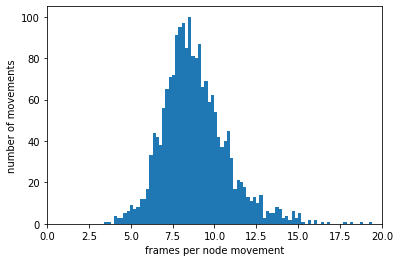

In [9]:
plt.hist(all_node_speeds, bins = 100)
plt.xlim([0,20])
plt.xlabel('frames per node movement')
plt.ylabel('number of movements')
plt.show()

In [11]:
#Compute the average number of frames taken for moving from one cell to another
all_mice_cell_speeds = []
move_threshold = 100 #the threshold of cell movements (change of cell) in a valid bout
percentile = 10 #the percentile of the fastest and slowest movements excluded from the analysis
for i, mouse_name in enumerate(RewNames + UnrewNamesSub):
    tf = LoadTraj(mouse_name + '-tf')
    n_bouts = np.shape(tf.fr)[0] #the number of bouts

    n_moves = np.zeros(n_bouts) #the number of movements from one cell to another
    for b in range(n_bouts):
        n_moves[b] = np.nonzero(np.ediff1d(tf.ce[b]))[0].size

    valid_bouts = np.where(n_moves >= move_threshold)[0] #valid bouts with enough movements

    speeds = np.zeros(valid_bouts.size) #only compute the movements of valid bouts
    for b, bout_index in enumerate(valid_bouts):
        move_frames = np.nonzero(np.ediff1d(tf.ce[bout_index]))[0] #frames where cell movements (from one cell to another) happen
        move_cells = tf.ce[bout_index][move_frames] #the cells where the movements start
        #The back-and-forth movements are exluded because they may happen when mice stand between two cells and thus
        #the cell positions identified by the recordings are unstable
        back_and_forth_index = np.where(move_cells[2:] == move_cells[:-2])[0]
        invalid_move_index = np.concatenate((back_and_forth_index + 1, back_and_forth_index + 2))
        valid_move_index = np.setdiff1d(np.arange(move_frames.size), invalid_move_index)
        valid_move_frames = move_frames[valid_move_index]
        
        
        speed = np.ediff1d(valid_move_frames) #compute the number of frames between two adjacent movements
        lower, higher = np.percentile(speed, [percentile, 100 - percentile]) #exclude the slowest ones and fastest movements
        normal_speed = speed[np.where(np.logical_and(speed >= lower, speed <= higher))[0]]
        speeds[b] = normal_speed.mean()
        
    all_mice_cell_speeds.append(speeds)

In [12]:
all_mice_mean_cell_speeds = np.zeros(19)
for m in range(19):
    all_mice_mean_cell_speeds[m] = np.mean(all_mice_cell_speeds[m])
np.mean(all_mice_mean_cell_speeds)

8.27303872987753

In [13]:
all_cell_speeds = []
for speeds in all_mice_cell_speeds:
    all_cell_speeds.extend(speeds)
np.mean(all_cell_speeds)

8.080709727329856

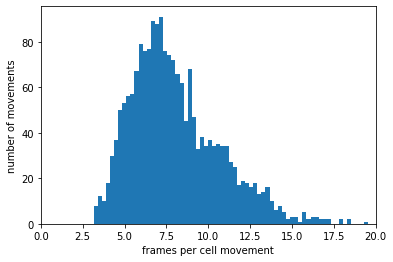

In [14]:
plt.hist(all_cell_speeds, bins = 100)
plt.xlim([0,20])
plt.xlabel('frames per cell movement')
plt.ylabel('number of movements')
plt.show()